# Nigerian Inflation & Stock Market Analysis
This notebook analyzes Nigerian inflation trends, stock market performance, and the relationship between inflation and the stock market using historical data.
Datasets:
- **CBN Inflation Measures (2003–2025)**
- **NGX Stocks (2000–2025)**
- **NGX Company List**

In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")


In [17]:
# Load datasets
inflation = pd.read_csv("C:/Users/DELL/Documents/favoured/datasets/Nigeria Finanical Market Data/CBN Inflation Measures (2003-2025).csv")
stocks = pd.read_csv("C:/Users/DELL/Documents/favoured/datasets/Nigeria Finanical Market Data/NGX Stocks 2000 - 2025.csv")
companies = pd.read_csv("C:/Users/DELL/Documents/favoured/datasets/Nigeria Finanical Market Data/ngx_company_list.csv")

# Parse dates
inflation.rename({'Period':'Date'}, axis = 1, inplace = True)
stocks['Date'] = pd.to_datetime(stocks['Date'])
inflation['Date'] = pd.to_datetime(inflation['Date'])

inflation.head(), stocks.head(), companies.head()

(        Date           Inflation Measure   Value
 0 2025-04-01  All Items (Year on Change)  0.2371
 1 2025-03-01  All Items (Year on Change)  0.2423
 2 2025-02-01  All Items (Year on Change)  0.2318
 3 2025-01-01  All Items (Year on Change)  0.2448
 4 2024-12-01  All Items (Year on Change)  0.1544,
      Symbol              Sector       Date  index  Price  Open  High   Low  \
 0  ABBEYBDS  FINANCIAL SERVICES 2025-05-16      0   6.87  7.63  7.54  6.87   
 1  ABBEYBDS  FINANCIAL SERVICES 2025-05-15      1   7.63  7.63  7.63  7.63   
 2  ABBEYBDS  FINANCIAL SERVICES 2025-05-14      2   7.63  7.63  7.63  7.63   
 3  ABBEYBDS  FINANCIAL SERVICES 2025-05-13      3   7.63  7.63  7.63  7.63   
 4  ABBEYBDS  FINANCIAL SERVICES 2025-05-12      4   7.69  7.00  7.69  7.69   
 
   Change %  vol multiplier     Volume             Company Name  \
 0   -9.96%          1000.0    40500.0  ABBEY MORTGAGE BANK PLC   
 1    0.00%          1000.0    33610.0  ABBEY MORTGAGE BANK PLC   
 2    0.00%          1

In [21]:
print("Column names in the Inflation DataFrame:", inflation.columns.tolist())
print("Column names in the Stocks DataFrame:", stocks.columns.tolist())

Column names in the DataFrame: ['Date', 'Inflation Measure', 'Value']


In [25]:
inflation_wide = inflation.pivot(index='Date', columns='Inflation Measure', values='Value').reset_index()
inflation_wide

Inflation Measure,Date,All Items (12 Months Avg. Change),All Items (Year on Change),All Items Less Farm Produce (12 Months Avg. Change)/2,All Items Less Farm Produce (Year on Change)/2,All Items Less Farm Produce and Energy (12 Months Avg. Change)/3,All Items Less Farm Produce and Energy (Year on Change)/3,Food (12 Months Avg. Change)/1,Food (Year on Change)/1
0,2003-01-01,0.1230,0.1060,0.1340,0.1610,0.0860,0.1360,0.1160,0.0750
1,2003-02-01,0.1140,0.0730,0.1430,0.1420,0.0890,0.1210,0.0970,0.0350
2,2003-03-01,0.1050,0.0590,0.1500,0.1540,0.0940,0.1390,0.0790,0.0010
3,2003-04-01,0.1010,0.0830,0.1560,0.1690,0.1040,0.1760,0.0690,0.0330
4,2003-05-01,0.1000,0.0870,0.1630,0.1760,0.1130,0.1550,0.0630,0.0330
...,...,...,...,...,...,...,...,...,...
263,2024-12-01,0.3143,0.1544,0.2490,0.1248,0.2566,0.1305,0.3703,0.1794
264,2025-01-01,0.3088,0.2448,0.2473,0.2193,0.2553,0.2259,0.3609,0.2608
265,2025-02-01,0.3009,0.2318,0.2449,0.2206,0.2533,0.2301,0.3474,0.2351
266,2025-03-01,0.2930,0.2423,0.2439,0.2415,0.2520,0.2443,0.3310,0.2179


In [27]:
print("Column names in the DataFrame:", inflation_wide.columns.tolist())

Column names in the DataFrame: ['Date', 'All Items (12 Months Avg. Change)', 'All Items (Year on Change)', 'All Items Less Farm Produce (12 Months Avg. Change)/2', 'All Items Less Farm Produce (Year on Change)/2', 'All Items Less Farm Produce and Energy (12 Months Avg. Change)/3', 'All Items Less Farm Produce and Energy (Year on Change)/3', 'Food (12 Months Avg. Change)/1', 'Food (Year on Change)/1']


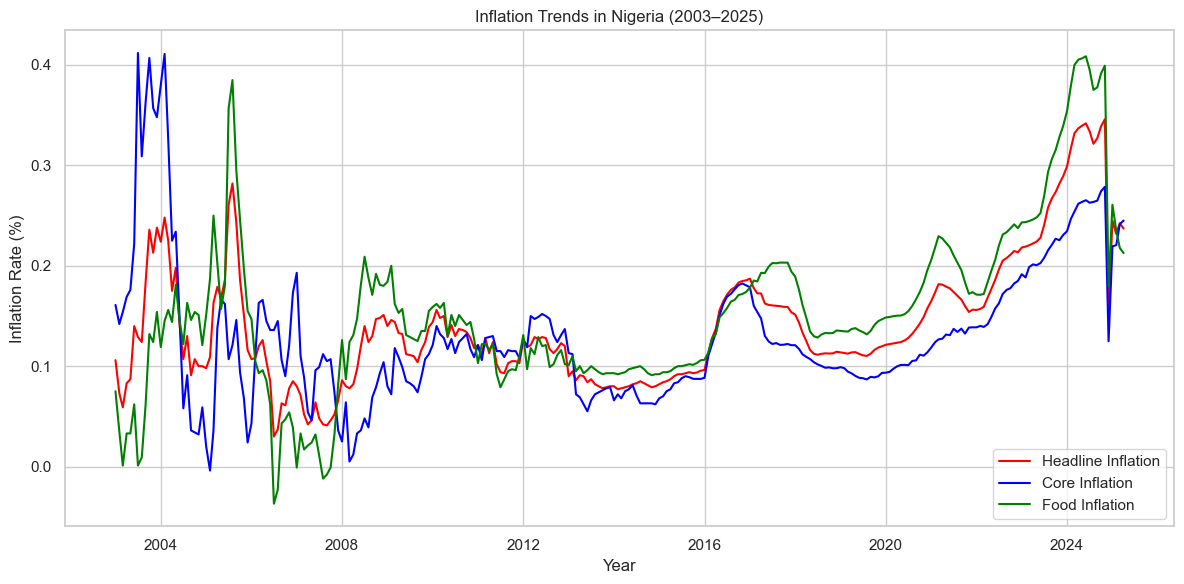

Inflation Measure,All Items (Year on Change),All Items Less Farm Produce (Year on Change)/2,Food (Year on Change)/1
Year,,,
2003,0.139333,0.268333,0.060083
2004,0.153833,0.169417,0.145583
2005,0.178500,0.089833,0.230250
2006,0.083750,0.127917,0.059333
2007,0.054167,0.093417,0.019167


In [29]:
plt.figure(figsize=(12,6))

plt.plot(inflation_wide['Date'], inflation_wide['All Items (Year on Change)'], 
         label='Headline Inflation', color='red')
plt.plot(inflation_wide['Date'], inflation_wide['All Items Less Farm Produce (Year on Change)/2'], 
         label='Core Inflation', color='blue')
plt.plot(inflation_wide['Date'], inflation_wide['Food (Year on Change)/1'], 
         label='Food Inflation', color='green')
plt.title("Inflation Trends in Nigeria (2003–2025)")
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.legend()
plt.tight_layout()
plt.show()

# Extract year and calculate annual averages
inflation_wide['Year'] = inflation_wide['Date'].dt.year
annual_avg_inflation = inflation_wide.groupby('Year')[
    ['All Items (Year on Change)', 
     'All Items Less Farm Produce (Year on Change)/2', 
     'Food (Year on Change)/1']].mean()
annual_avg_inflation.head()

In [35]:
# Merge stock data with company info
stocks = stocks.merge(companies, on="Symbol", how="left")

# Create a new combined Volume column
# First, handle any potential NaN values in either column
stocks['Volume_x'] = stocks['Volume_x'].fillna(0)
stocks['Volume_y'] = stocks['Volume_y'].fillna(0)

# Create the combined Volume column (you can choose to add or use the maximum)
stocks['Volume'] = stocks['Volume_x'] + stocks['Volume_y']  
# Alternative: stocks['Volume'] = stocks[['Volume_x', 'Volume_y']].max(axis=1)  # Taking the maximum of the two

# Top traded companies in 2024
top_traded = stocks[stocks['Date'].dt.year == 2024].groupby('Company Name')['Volume'].sum().sort_values(ascending=False).head(5)
top_traded

Company Name
ACCESS HOLDINGS PLC                   1.456938e+10
GUARANTY TRUST HOLDING COMPANY PLC    1.295639e+10
FIDELITY BANK PLC                     1.199458e+10
UNITED BANK FOR AFRICA PLC            1.076250e+10
FIRST HOLDCO PLC                      7.198003e+09
Name: Volume, dtype: float64

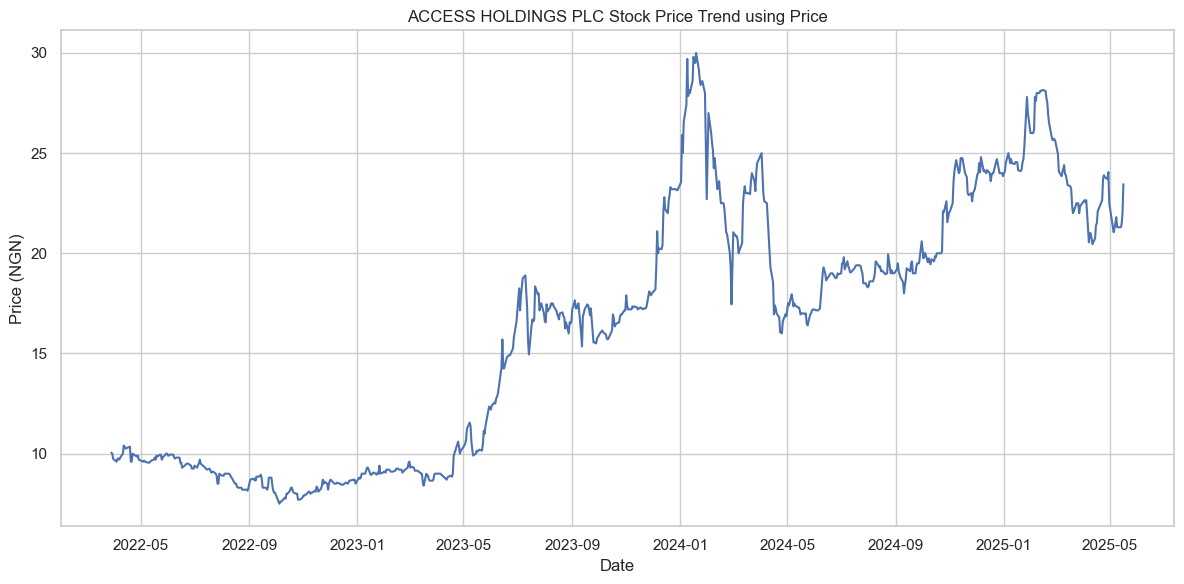

In [49]:
# Plot stock trend for the most traded company
sample_symbol = top_traded.index[0]
sample_data = stocks[stocks['Company Name'] == sample_symbol]

# Check if we have any data for this company
if len(sample_data) == 0:
    print(f"No data found for {sample_symbol}. Check if 'Company Name' matches exactly.")
    # Try using Symbol instead
    sample_data = stocks[stocks['Symbol'] == sample_symbol]
    if len(sample_data) == 0:
        print(f"No data found for symbol {sample_symbol} either.")

# Check which price column has data
price_columns = ['OFFICIAL_CLOSE', 'Price', 'PrevClose', 'StockPriceCur']
valid_column = None

for col in price_columns:
    if col in sample_data.columns and sample_data[col].notna().any():
        valid_column = col
        break

if valid_column:
    plt.figure(figsize=(12,6))
    plt.plot(sample_data['Date'], sample_data[valid_column])
    plt.title(f"{sample_symbol} Stock Price Trend using {valid_column}")
    plt.xlabel("Date")
    plt.ylabel(f"{valid_column} (NGN)")
    plt.tight_layout()
    plt.show()
else:
    print("No valid price data found in any of the expected columns.")
    print("Available columns with data:")
    for col in sample_data.columns:
        if sample_data[col].notna().any():
            print(f"- {col}")

Correlation between average stock prices and inflation: 0.57


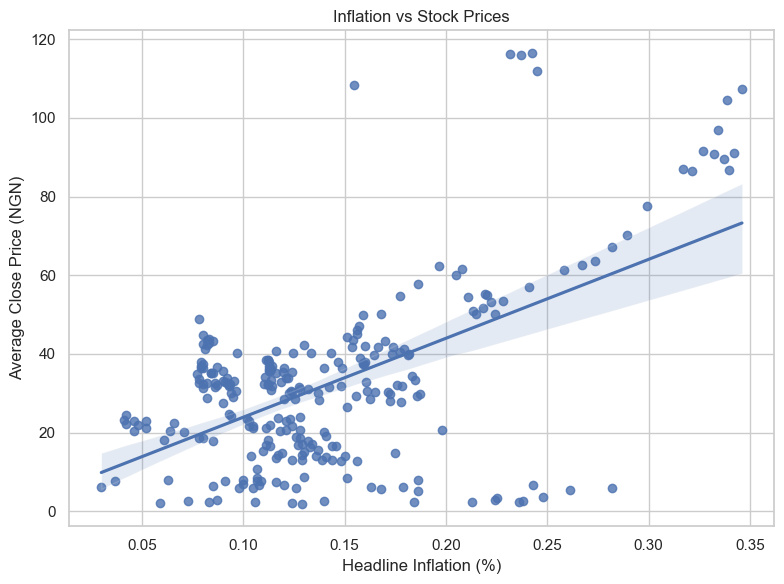

In [65]:

# Monthly average close price
monthly_avg_close = stocks.groupby(stocks['Date'].dt.to_period("M"))['Price'].mean().reset_index()
monthly_avg_close['Date'] = monthly_avg_close['Date'].dt.to_timestamp()

# Monthly inflation
monthly_inflation = inflation_wide.groupby(inflation_wide['Date'].dt.to_period("M"))['All Items (Year on Change)'].mean().reset_index()
monthly_inflation['Date'] = monthly_inflation['Date'].dt.to_timestamp()

# Merge
merged_data = pd.merge(monthly_avg_close, monthly_inflation, on="Date", how="inner")

# Correlation
corr_value = merged_data['Price'].corr(merged_data['All Items (Year on Change)'])
print(f"Correlation between average stock prices and inflation: {corr_value:.2f}")

# Scatter plot
plt.figure(figsize=(8,6))
sns.regplot(x='All Items (Year on Change)', y='Price', data=merged_data)
plt.title("Inflation vs Stock Prices")
plt.xlabel("Headline Inflation (%)")
plt.ylabel("Average Close Price (NGN)")
plt.tight_layout()
plt.show()
